In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import tensorflow as tf
assert tf.__version__.startswith('2')

import os
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential

In [0]:
folder_name = '/content/drive/My Drive/emotion/training_set'
base_dir = os.path.join(folder_name)

In [0]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.1
)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='training')

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='validation')

for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape
print(len(train_generator), len(val_generator))

Found 35 images belonging to 7 classes.
Found 0 images belonging to 7 classes.
1 0


In [0]:
print (train_generator.class_indices)

{'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3, 'Neutral': 4, 'Sad': 5, 'Surprise': 6}


In [0]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)
print (IMG_SHAPE)
# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

(224, 224, 3)


In [0]:
base_model.trainable = False

In [0]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(32, 1, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(7, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 7, 7, 32)          40992     
_________________________________________________________________
dropout_24 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
global_average_pooling2d_12  (None, 32)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 7)                 231       
Total params: 2,299,207
Trainable params: 41,223
Non-trainable params: 2,257,984
_________________________________________________________________


In [0]:
epochs = 10

history = model.fit(train_generator, 
                    steps_per_epoch=len(train_generator), 
                    epochs=epochs, 
                    validation_data=val_generator, 
                    validation_steps=len(val_generator))

Epoch 1/10
1/1 [==============================] - 0s 1ms/step - loss: 0.9178 - accuracy: 0.8286
Epoch 2/10
1/1 [==============================] - 0s 1ms/step - loss: 0.9083 - accuracy: 0.8286
Epoch 3/10
1/1 [==============================] - 0s 1ms/step - loss: 0.9302 - accuracy: 0.7429
Epoch 4/10
1/1 [==============================] - 0s 2ms/step - loss: 0.8260 - accuracy: 0.8571
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 0.8207 - accuracy: 0.8286
Epoch 6/10
1/1 [==============================] - 0s 1ms/step - loss: 0.8094 - accuracy: 0.8000
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 0.8060 - accuracy: 0.7429
Epoch 8/10
1/1 [==============================] - 0s 1ms/step - loss: 0.5889 - accuracy: 0.9143
Epoch 9/10
1/1 [==============================] - 0s 1ms/step - loss: 0.6891 - accuracy: 0.8857
Epoch 10/10
1/1 [==============================] - 0s 1ms/step - loss: 0.5181 - accuracy: 0.9714


In [0]:
class_names = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

array(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'],
      dtype='<U8')

In [0]:
predicted_batch = model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]
label_id = np.argmax(label_batch, axis=-1)

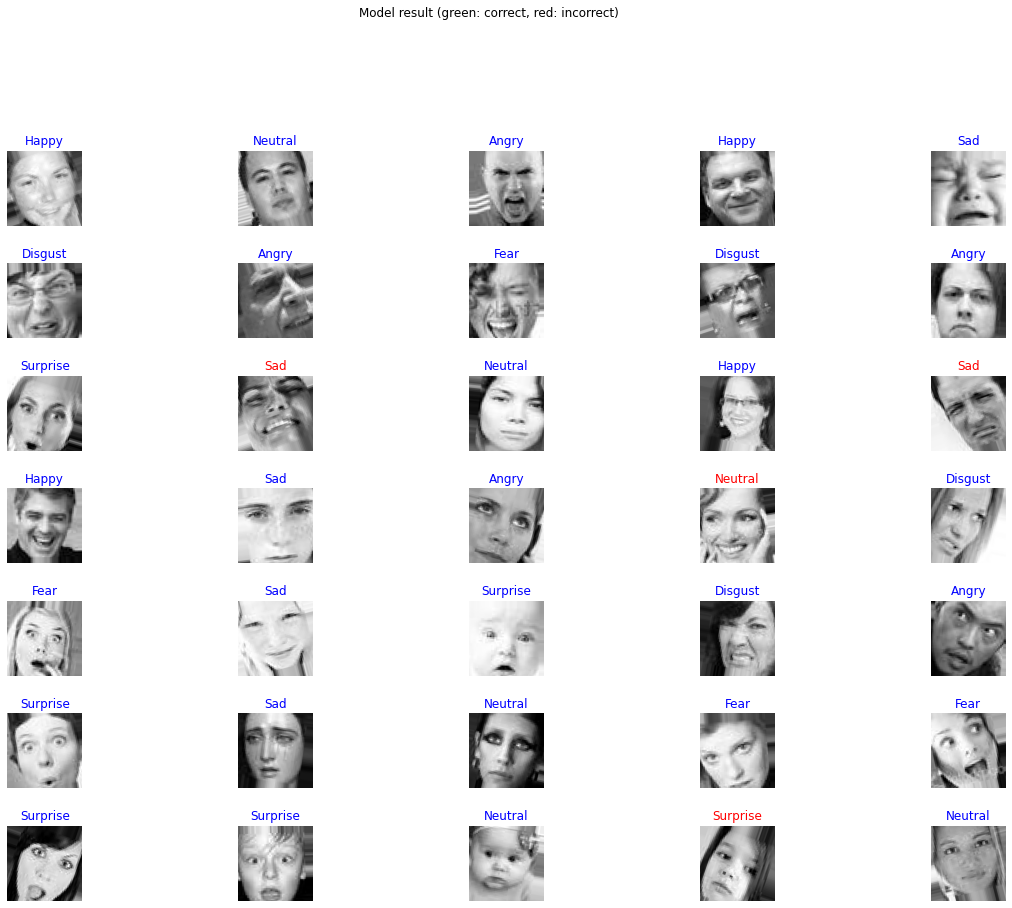

In [0]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.5)
for n in range(35):
  plt.subplot(10,5,n+1)
  plt.imshow(image_batch[n])
  color = "blue" if predicted_id[n] == label_id[n] else "red"
  plt.title(predicted_label_batch[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model result (green: correct, red: incorrect)")


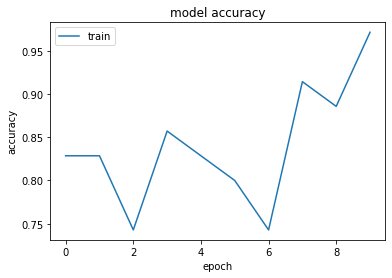

In [0]:
## summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

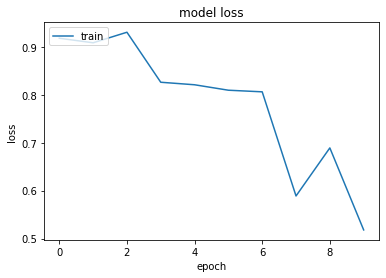

In [0]:
## summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()